In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

In [3]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'

In [4]:
pagedf = pd.read_feather(PROPHET_PATH+'pagedf.f')
ds = pd.read_feather(PROPHET_PATH+'ds.f')

In [11]:
pagedf['145062'].count()

0

In [20]:
pagedf.count().sort_values()[pagedf.count().sort_values() <= 10]

145062     0
4283       0
4282       0
23244      0
81479      0
79686      0
109418     0
109419     0
109420     0
109421     0
109422     0
109423     0
4284       0
109424     0
109426     0
109427     0
109428     0
109429     0
109430     0
109431     0
46370      0
46369      0
46368      0
137440     0
109432     0
109425     0
109433     0
4285       0
4286       0
4308       0
          ..
83684      9
97705      9
20309      9
109413     9
123837     9
51365     10
117552    10
21277     10
49199     10
139740    10
65421     10
80442     10
127820    10
95531     10
12660     10
84662     10
84653     10
22384     10
42965     10
21303     10
90223     10
70932     10
21287     10
91905     10
20464     10
43766     10
83838     10
143143    10
83819     10
23845     10
Length: 1003, dtype: int64

In [43]:
pagedf.iloc[0:-60].count().sort_values()[pagedf.iloc[0:-60].count().sort_values() <= 2]

145062    0
95463     0
105109    0
142782    0
95531     0
95556     0
123690    0
105108    0
95445     0
105107    0
105105    0
123689    0
123688    0
123687    0
123686    0
123685    0
123684    0
105106    0
95408     0
95329     0
95325     0
10771     0
10749     0
26601     0
94760     0
94867     0
78761     0
95082     0
45801     0
95173     0
         ..
140184    2
68285     2
27903     2
132051    2
20429     2
48657     2
20450     2
68684     2
6549      2
50102     2
82360     2
50006     2
127378    2
20448     2
55864     2
83800     2
84649     2
109373    2
94752     2
21279     2
21275     2
128318    2
55655     2
21274     2
8297      2
83824     2
140331    2
118803    2
84854     2
21299     2
Length: 1995, dtype: int64

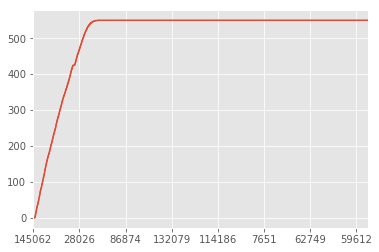

In [16]:
pagedf.count().sort_values().plot()

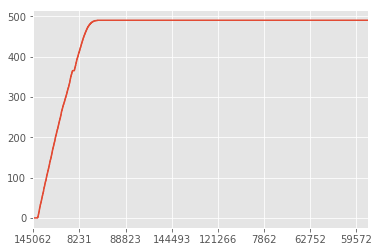

In [15]:
pagedf.iloc[0:-60].count().sort_values().plot()

In [21]:
full_df = pd.read_csv('../data/train_1.csv')

In [22]:
full_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [23]:
df = full_df.set_index('Page').T; df

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,9.0,13.0,4.0,26.0,NaN,8.0,NaN,127.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,9.0,22.0,0.0,14.0,NaN,5.0,NaN,53.0,35.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,22.0,11.0,3.0,9.0,NaN,17.0,NaN,37.0,15.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,26.0,10.0,4.0,11.0,NaN,24.0,NaN,20.0,14.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-10,24.0,4.0,4.0,16.0,NaN,7.0,NaN,32.0,22.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
check = pagedf.count().sort_values().values == df.count().sort_values().values

In [30]:
check.sum()

145063

In [50]:
pagedf.apply(pd.value_counts)

KeyboardInterrupt: 

In [57]:
pagedfzero = pagedf.applymap(lambda x: np.nan if x > 0 else x)

In [58]:
pagedfzero.count().sum()

1060418

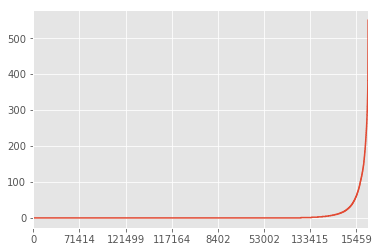

In [59]:
pagedfzero.count().sort_values().plot()

In [54]:
pagedf.shape

(550, 145063)

In [61]:
pagedfzero.count().sum() / (550*145063)

0.013291002717941359

In [65]:
pagedf.isnull().sum().sort_values()

0           0
93309       0
93308       0
93307       0
93306       0
93305       0
93304       0
93303       0
93302       0
93301       0
93300       0
93299       0
93298       0
93297       0
93296       0
93295       0
93294       0
93293       0
93292       0
93291       0
93290       0
93289       0
93288       0
93287       0
93286       0
93285       0
93284       0
93283       0
93310       0
93311       0
         ... 
109427    550
109426    550
109431    550
109425    550
109423    550
109422    550
109421    550
109420    550
109419    550
109418    550
109424    550
74707     550
109432    550
109434    550
109445    550
109444    550
109443    550
109442    550
72746     550
72747     550
109433    550
72748     550
109440    550
109439    550
109438    550
109437    550
109436    550
109435    550
109441    550
145062    550
Length: 145063, dtype: int64

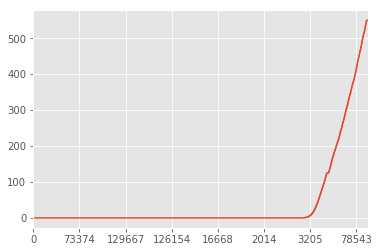

In [66]:
pagedf.isnull().sum().sort_values().plot()

In [69]:
pagedf.isnull().sum().sum()

6192931

In [68]:
pagedf.isnull().sum().sum() / (550*145063)

0.077620582405262165

## Version 1.1f
Should set version directory name in next cell. Should describe version specifics (outliers, holidays, validation period)

* Val indexing on -60
* No outlier fixing
* Linear growth
* Truncating predictions at 0

### Remarks
* ?

In [31]:
# should break if the dir already exists - avoids accidental overwriting
VERSION = 'v1.1f/'
val_lims = (0,-60)
os.makedirs(PROPHET_PATH+VERSION)

In [32]:
#pagedf = pagedf.loc[:,:'10']

# WARNING:
Turned off the chained assignment warning - when slicing dfs they can return copies sometimes instead,
which will mean your assignment wont be done on the actual base df.
Not sure why it's still compaining at me when I'm using .loc for assignations everywhere... shitty

In [33]:
pd.options.mode.chained_assignment = None

In [34]:
def process_page(page):
    df = ds.join(pagedf[page])
    df.columns = ['ds','y']
    # note this is doing validation on last 60 days
    # should also consider doing validation on the time period we are forcasting
    traindf = df.iloc[val_lims[0]:val_lims[1]]
    traindf['train'] = 1 # feather won't serialize bool so 1s and 0s...
    # do outlier removal here
    #traindf.loc[traindf.y > traindf.y.quantile(.95), ['y']] = None
    m = Prophet(yearly_seasonality=True)
    m.fit(traindf)
    forecast = m.predict(ds)
    forecast['yhat_org'] = forecast['yhat']
    forecast.loc[forecast['yhat'] < 0,['yhat']] = 0.0
    forecast = forecast.join(df.y)
    forecast = forecast.join(traindf.loc[:,['train']]).fillna({'train':0}) # 0 bools
    forecast.to_feather(PROPHET_PATH+VERSION+page+'df.f')
    with open(PROPHET_PATH+VERSION+page+'m.pk', 'wb') as file:
        pk.dump(m,file)
    full_smape = wiki.val.smape(forecast.y, forecast.yhat)
    val_smape = wiki.val.smape(forecast[forecast['train'] == 0].y,forecast[forecast['train'] == 0].yhat)
    return (page, full_smape, val_smape)

In [36]:
process_page('23845')

TypeError: can only operate on a datetime with a rhs of a timedelta/DateOffset for addition and subtraction, but the operator [__truediv__] was passed

In [38]:
process_page('79692')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


('79692', 183.99463488819524, 200.0)

In [39]:
df79692 = pd.read_feather(PROPHET_PATH+VERSION+'79692df.f')

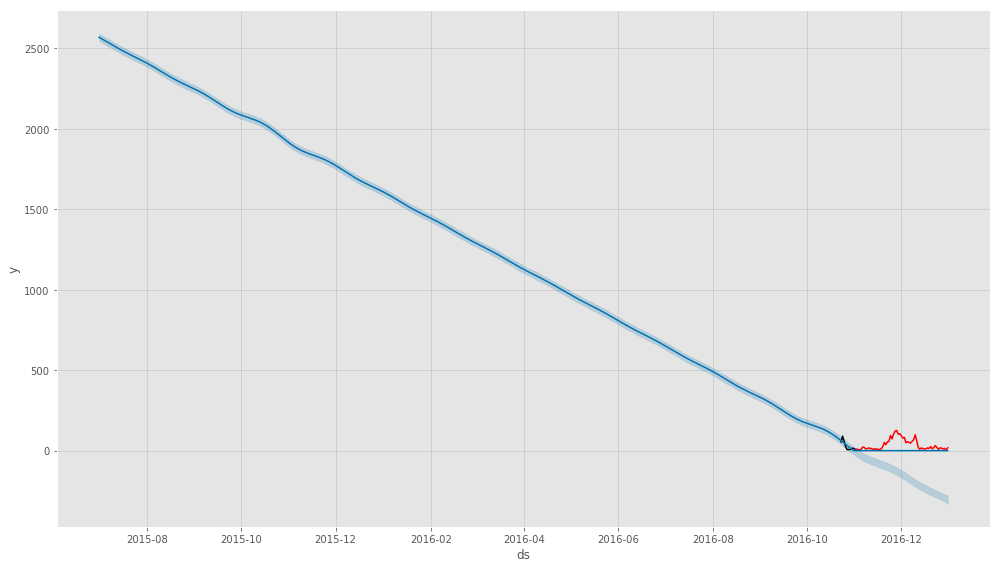

In [40]:
wiki.newphet.prophet_plot(df79692)

In [42]:
process_page('109038')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


RuntimeError: k initialized to invalid value (nan)



In [ ]:
df109038 = pd.read_feather(PROPHET_PATH+VERSION+'109038df.f')

In [ ]:
wiki.newphet.prophet_plot(df109038)

In [45]:
process_page('21299')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


('21299', 66.666666666666671, 200.0)

In [46]:
df21299 = pd.read_feather(PROPHET_PATH+VERSION+'21299df.f')

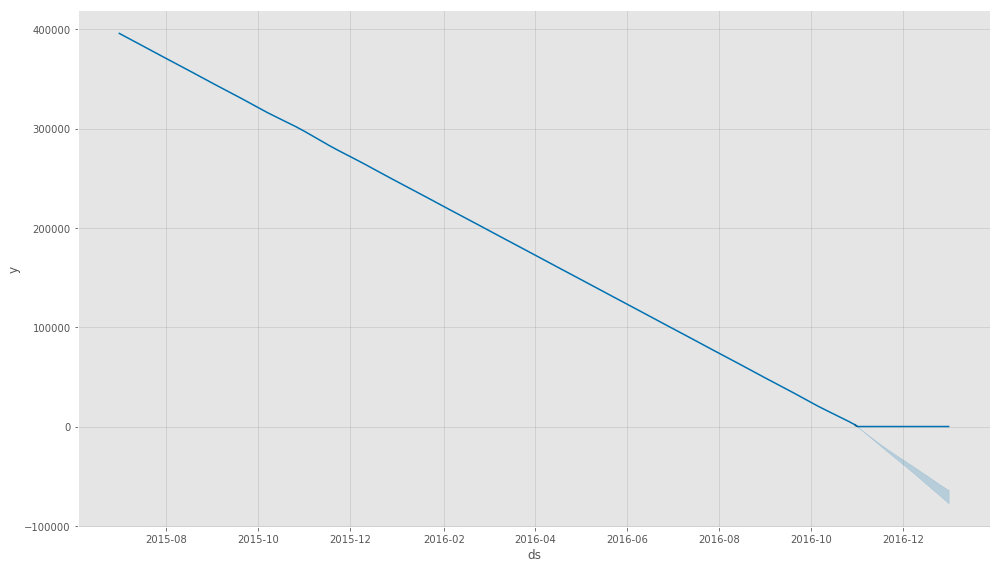

In [47]:
wiki.newphet.prophet_plot(df21299)

In [9]:
def wrapper(pages):
    val_results = []
    for page in tqdm(pages):
        val_results.append(process_page(page))
    return val_results

In [10]:
total_proc = mp.cpu_count()-1; total_proc

15

In [11]:
col_split = np.array_split(pagedf.columns, total_proc)
mp_pool = mp.Pool(total_proc)

  0%|          | 4/9671 [00:17<11:50:31,  4.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  0%|          | 9/9671 [00:33<8:33:57,  3.19s/it]]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  0%|          | 16/9671 [01:09<11:43:00,  4.37s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  2%|▏         | 160/9671 [09:08<7:27:32,  2.82s/it] 

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  2%|▏         | 227/9671 [12:18<8:22:28,  3.19s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  8%|▊         | 783/9671 [35:34<5:56:41,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 13%|█▎        | 1242/9670 [54:01<5:39:21,  2.42s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 15%|█▍        | 1429/9670 [1:01:47<5:31:02,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 23%|██▎       | 2266/9671 [1:35:51<4:58:32,  2.42s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 24%|██▎       | 2293/9671 [1:36:47<4:55:43,  2.40s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 25%|██▌       | 2464/9671 [1:43:51<4:48:57,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 26%|██▌       | 2520/9671 [1:45:36<4:47:42,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 28%|██▊       | 2670/9671 [1:52:05<4:40:26,  2.40s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3092/9671 [2:10:30<5:26:47,  2.98s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3093/9671 [2:10:33<5:22:27,  2.94s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3094/9671 [2:10:35<5:17:50,  2.90s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3095/9671 [2:10:38<5:14:35,  2.87s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3096/9671 [2:10:41<5:13:57,  2.87s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3097/9671 [2:10:44<5:11:57,  2.85s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3098/9671 [2:10:47<5:12:07,  2.85s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3099/9671 [2:10:50<5:10:23,  2.83s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3100/9671 [2:10:52<5:09:06,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3101/9671 [2:10:55<5:09:46,  2.83s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3102/9671 [2:10:58<5:08:19,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3103/9671 [2:11:01<5:08:50,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3104/9671 [2:11:04<5:08:46,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3105/9671 [2:11:06<5:07:56,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3106/9671 [2:11:09<5:08:54,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3107/9671 [2:11:12<5:08:04,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3108/9671 [2:11:15<5:08:33,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3109/9671 [2:11:18<5:07:24,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3110/9671 [2:11:20<5:06:37,  2.80s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3111/9671 [2:11:23<5:07:28,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3112/9671 [2:11:26<5:06:16,  2.80s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3113/9671 [2:11:29<5:07:02,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [12]:
with utils.clock():
    %time val_results = mp_pool.map(wrapper, col_split)

TypeError: can only operate on a datetime with a rhs of a timedelta/DateOffset for addition and subtraction, but the operator [__truediv__] was passed

Elapsed time 7889.484010696411 seconds


In [13]:
val_results = [item for sublist in val_results for item in sublist]
val_results = pd.DataFrame(val_results, columns=['page_index',VERSION[:-1]+'_full',VERSION[:-1]+'_val'])

NameError: name 'val_results' is not defined

In [ ]:
val_results.to_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f')